In [3]:
# Importa as bibliotecas necessárias
import pandas as pd
import scipy.stats

In [7]:

# Carregua o dataset
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

In [8]:
# Limpa o dataset para remover colunas desnecessárias
df.drop(df.iloc[:,5:15], axis=1, inplace=True)


In [9]:

# Renomeie algumas colunas para torná-las mais compreensíveis
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True)

In [10]:
# Realiza o teste qui-quadrado de independência
cont_table = pd.crosstab(df['Salmo trutta fario'], df['Country'])
stat, p, _, _ = scipy.stats.chi2_contingency(cont_table)
print('Chi-Square Statistic:', stat)
print('p-value:', p)

Chi-Square Statistic: 496.3723854072799
p-value: 2.9162328651936495e-107


In [11]:
# Selecione os oito locais de amostragem mais frequentes
catch_count = df['Catchment_name'].value_counts()
top_catches = catch_count.index[:8]
df_topcatch = df[df['Catchment_name'].isin(top_catches)]

In [12]:
# Remove os valores nulos
df_topcatch_nonull = df_topcatch.dropna(subset=['Elevation_mean_catch'])

In [13]:
# Agrupa os dados por local de amostragem
catch_groups = [(name, group['Elevation_mean_catch']) for name, group in df_topcatch_nonull.groupby('Catchment_name')]
catch_elevation_only = [group for _, group in catch_groups]

In [14]:
# Kruskal-Wallis Test
stat, p_value = scipy.stats.kruskal(*catch_elevation_only)
print("Kruskal-Wallis Test: p-value =", p_value)

Kruskal-Wallis Test: p-value = 3.7056116510329714e-284


In [16]:
# One-way ANOVA Test
stat, p_value = scipy.stats.f_oneway(*catch_elevation_only)
print("One-way ANOVA Test: p-value =", p_value)

One-way ANOVA Test: p-value = 1.369526482034513e-285


In [25]:
df_wine = pd.read_csv('/Users/rafael/Desktop/git_hub/greends_avcad_2024/people/Rafael/ex6/winequality_red.csv', sep=",")


In [27]:
# Adiciona uma nova coluna para categorizar a qualidade como "boa" ou "ruim"
df_wine["quality_category"] = df_wine["quality"].apply(lambda q: "good" if q > 5 else "bad")


In [28]:
# Separa as features e a variável alvo
features = df_wine.drop("quality_category", axis=1).columns

In [29]:
# Realiza o teste Mann-Whitney U para cada feature
results = {}
for feature in features:
    good_quality = df_wine[df_wine["quality_category"] == "good"][feature]
    bad_quality = df_wine[df_wine["quality_category"] == "bad"][feature]
    statistic, p_value = scipy.stats.mannwhitneyu(good_quality, bad_quality)
    results[feature] = (statistic, p_value)

In [30]:
# Ordena os resultados por valor p (ascendente)
sorted_results = dict(sorted(results.items(), key=lambda x: x[1][1]))

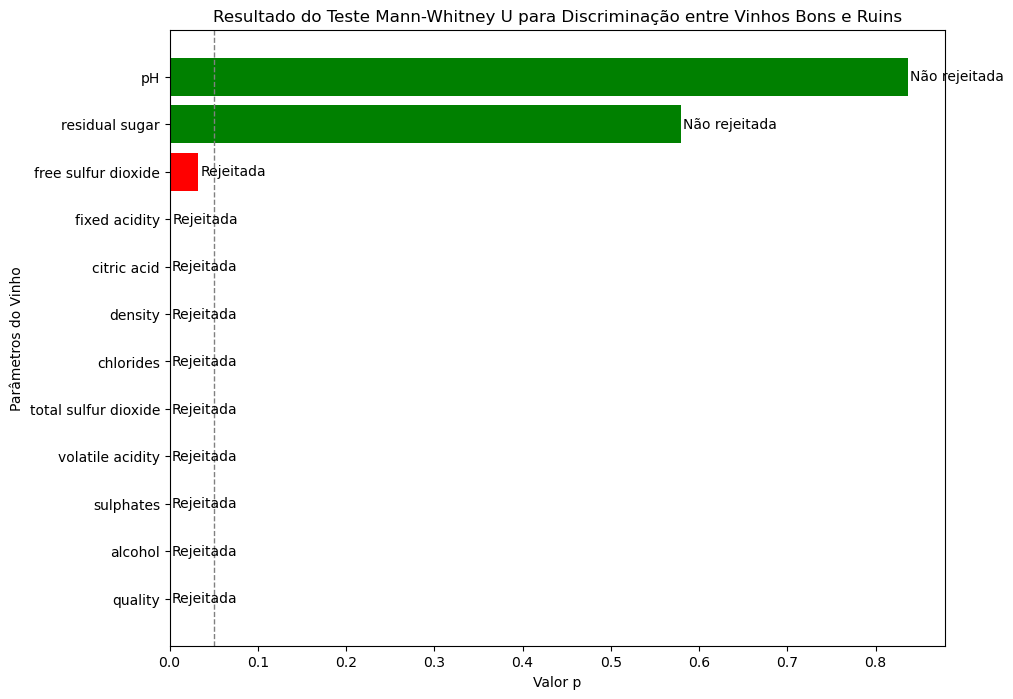

In [36]:
import matplotlib.pyplot as plt

# Extraia os nomes das features e os p-values
features = list(sorted_results.keys())
p_values = [pval[1] for pval in sorted_results.values()]

# Defina as cores com base na rejeição ou não da hipótese nula
colors = ['green' if pval >= alpha else 'red' for pval in p_values]

# Cria o gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(features, p_values, color=colors)

# Adiciona uma linha vertical para representar o valor de alfa
plt.axvline(x=alpha, color='gray', linestyle='--', linewidth=1)

# Adiciona rótulos e título
plt.xlabel('Valor p')
plt.ylabel('Parâmetros do Vinho')
plt.title('Resultado do Teste Mann-Whitney U para Discriminação entre Vinhos Bons e Ruins')

# Adiciona texto para indicar rejeição ou não da hipótese nula
for i in range(len(features)):
    plt.text(p_values[i] + 0.002, i, 'Rejeitada' if p_values[i] < alpha else 'Não rejeitada', verticalalignment='center')

# Exibe o gráfico
plt.show()
